In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Clients

In [3]:
n_clients = 1000

bias = np.random.normal(0, 10, size=n_clients)

goal = bias.mean()
print("bias", bias)
print("bias mean", bias.mean())

bias [ 2.65380923e-01 -2.22452349e+00 -4.42521927e+00  6.81869490e+00
 -7.12716457e-01  4.31553061e+00  7.72834237e+00 -4.95575310e+00
  6.36295985e+00 -2.84955791e+00 -1.52040557e+01 -1.81899958e+01
 -6.93669237e+00 -4.81560840e+00 -1.34010818e+01  3.90717846e+00
 -5.21429898e+00  1.59224200e+01 -9.48402839e+00  1.24513278e+00
 -1.09801647e+01  1.95964425e+01 -7.43152408e+00  1.19237128e+00
 -1.22622995e+01 -1.18555826e+01 -3.61936331e+00 -1.49084622e+01
 -7.38892793e+00 -5.02422365e-01  6.24430110e+00 -1.73165288e+00
  4.10172572e+00 -2.09415160e+00 -1.08068691e+01  4.87939006e-01
 -1.39806892e+01  8.65687787e+00 -6.31653665e+00 -1.68185064e+00
  3.52137037e+00 -1.20292651e+00 -1.23759865e+01 -6.74773055e+00
  6.79427910e+00  4.05175001e+00 -1.39739246e+01 -7.61863842e+00
 -1.01509604e+01  9.23112779e+00  4.02865054e+00 -1.95037138e+00
 -3.91028826e+00 -6.32351158e+00 -3.66800224e+00  2.01902133e+01
  2.43359077e+00 -2.96477140e+00 -4.34660126e+00 -7.97779322e-02
  3.79764153e-01 -1.

### Global averageing

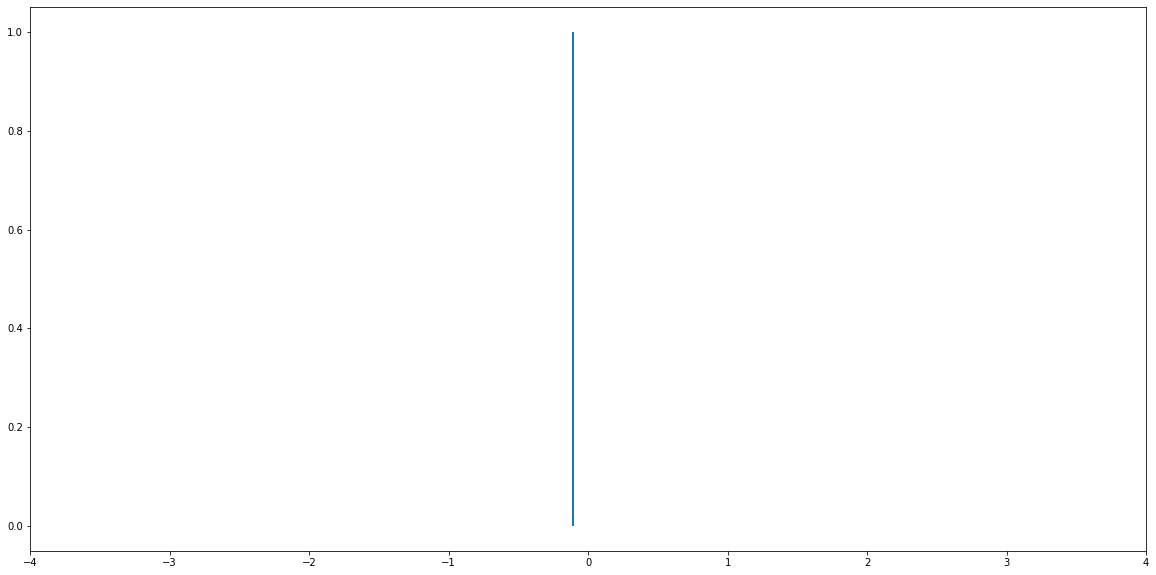

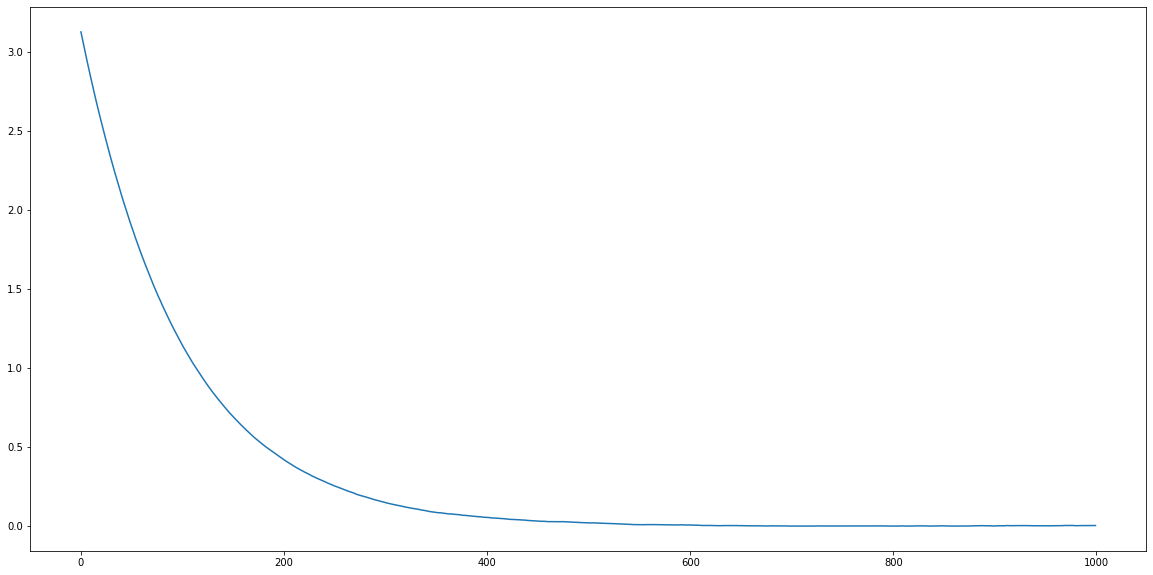

In [4]:
from IPython import display
import time

estimates = np.random.normal(3, 8, size=n_clients)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

error = []
x = []
for it in range(1000):
    estimates -= 0.01 * (estimates - np.random.normal(bias, 1))
    estimates[:] = estimates.mean()

    if it % 50 == 0:
        plt.cla()
        plt.xlim([-4, 4])
        plt.vlines(estimates, 0, 1) 

        display.clear_output(wait=True)
        display.display(plt.gcf())

        time.sleep(0.02)
    
     
    x.append(it)
    error.append(np.abs(estimates - goal).mean())

display.clear_output(wait=True)
  
plt.figure(figsize=(20, 10))
plt.plot(x, error)
plt.show()


### Gossip

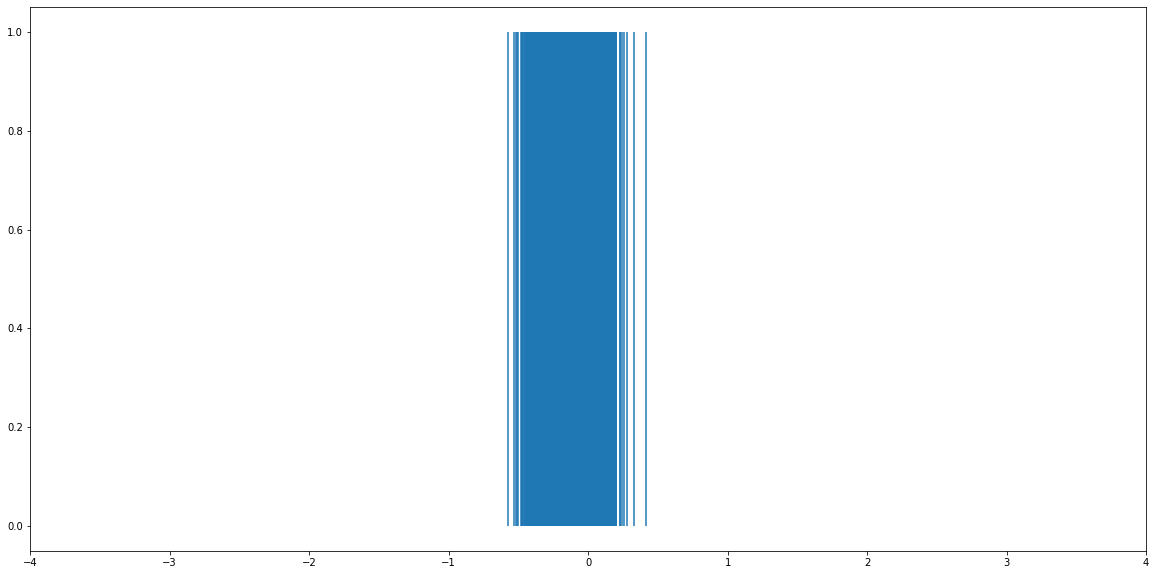

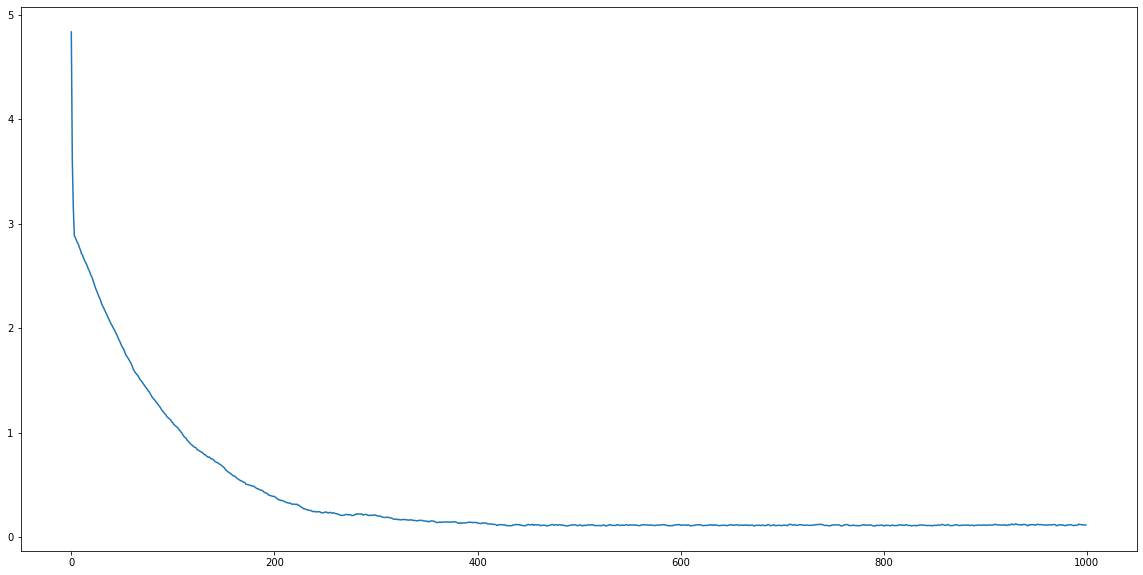

In [5]:
from IPython import display
import time

estimates = np.random.normal(3, 8, size=n_clients)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

client_ids = np.arange(n_clients)

error = []
x = []
for it in range(1000):
    estimates -= 0.01 * (estimates - np.random.normal(bias, 1))

    for i in range(n_clients):
        gossip_with = np.random.choice(client_ids)
        estimates[i] = (estimates[i] + estimates[gossip_with]) / 2
    
    if it % 50 == 0:
        plt.cla()
        plt.xlim([-4, 4])
        plt.vlines(estimates, 0, 1) 

        display.clear_output(wait=True)
        display.display(plt.gcf())

        time.sleep(0.02)
    
    x.append(it)
    error.append(np.abs(estimates - goal).mean())

display.clear_output(wait=True)

plt.figure(figsize=(20, 10))

plt.plot(x, error)
plt.show()


### Recursive doubling with random failures

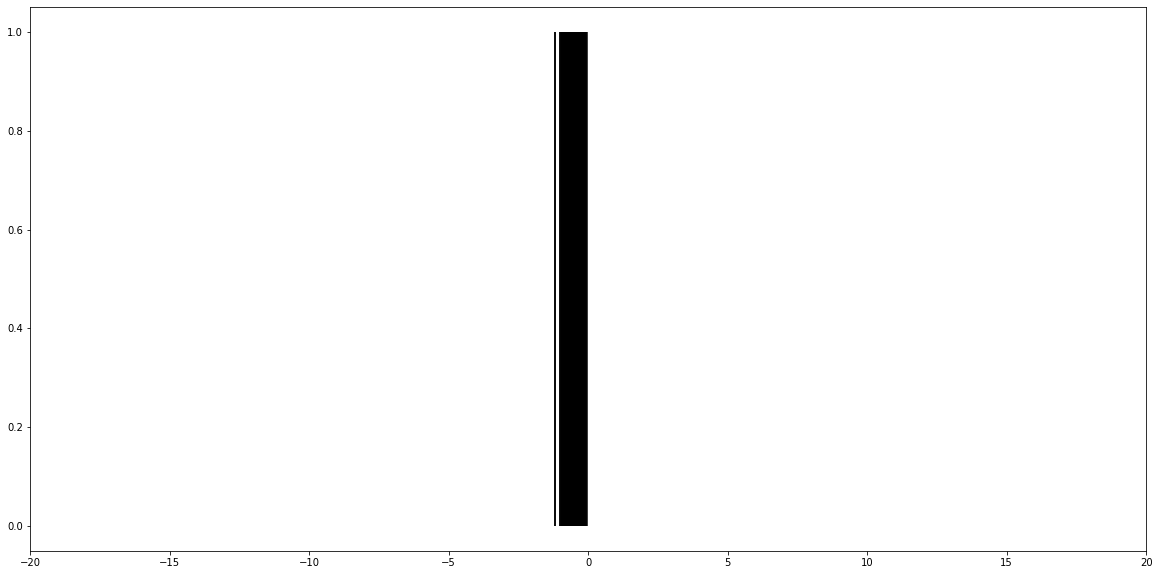

KeyboardInterrupt: 

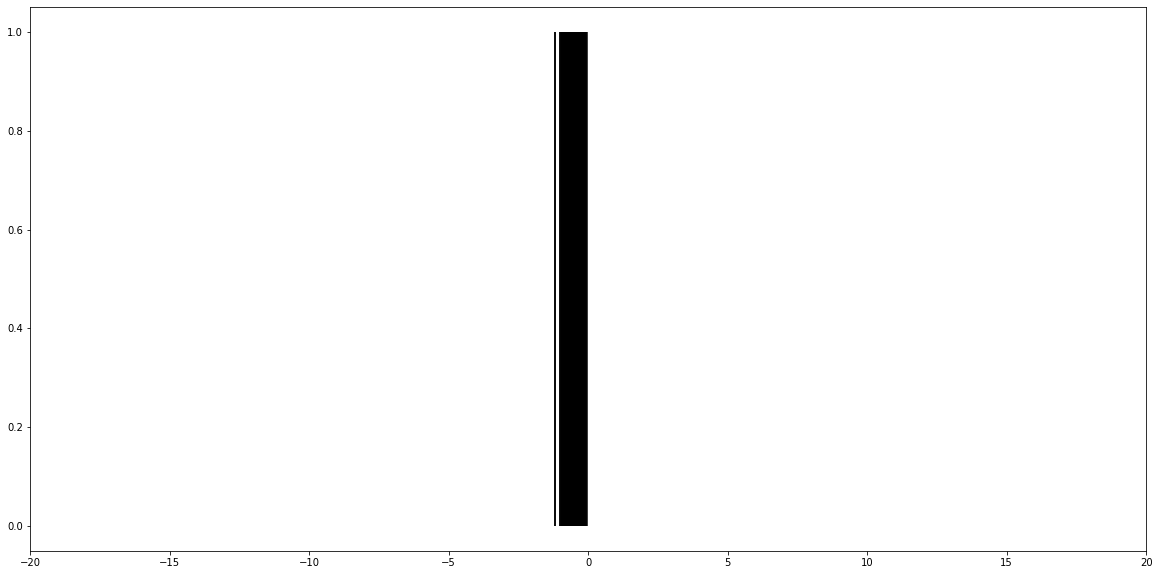

In [70]:
from IPython import display
import time

estimates = np.random.normal(3, 8, size=n_clients)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

error = []
x = []
for it in range(1000):
    # 90% success
    estimates -= 0.01 * (estimates - np.random.normal(bias, 1))

    success_matrix = (np.random.rand(n_clients, n_clients) > 0.)
    
    normalizing = success_matrix.sum(axis=0) 
    if normalizing.all():
        success_matrix = success_matrix / normalizing 
        estimates = success_matrix @ estimates

    if it % 50 == 0:
        plt.cla()
        plt.xlim([-20, 20])
        plt.vlines(estimates, 0, 1) 

        display.clear_output(wait=True)
        display.display(plt.gcf())

        time.sleep(0.02)
    
    x.append(it)
    error.append(np.abs(estimates - goal).mean())

display.clear_output(wait=True)

plt.figure(figsize=(20, 10))
plt.plot(x, error)
plt.show()